# 线性神经网络

## 线性代数
### 标量
标量由只有一个元素的张量表示。 下面的代码将实例化两个标量，并执行一些熟悉的算术运算，即加法、乘法、除法和指数。

In [1]:
import torch

x = torch.tensor([3.0])
y = torch.tensor([2.0])
x + y,x - y,x *y,x / y,x ** y

(tensor([5.]), tensor([1.]), tensor([6.]), tensor([1.5000]), tensor([9.]))

### 向量
向量是有方向的标量。创建，索引。

In [3]:
X = torch.arange(3)
X,X[2]

(tensor([0, 1, 2]), tensor(2))

访问张量的长度

In [4]:
len(X)

3

### 矩阵
指定两个分量创建一个m×n矩阵，下面创建一个5×4的矩阵

In [5]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

矩阵的转置（矩阵沿主对角线翻折）

In [6]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

对称矩阵$A=A^T$

In [10]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B,B.T

(tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]),
 tensor([[1, 2, 3],
         [2, 0, 4],
         [3, 4, 5]]))

In [11]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 多维度张量
就像向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构

In [12]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 张量的运算
给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量

In [20]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone()
A,A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

两个矩阵的按元素乘法称为哈达玛积（Hadamard product）（数学符号⊙）

In [14]:
A * B

tensor([[  0,   1,   4,   9],
        [ 16,  25,  36,  49],
        [ 64,  81, 100, 121],
        [144, 169, 196, 225],
        [256, 289, 324, 361]])

计算元素总和

In [15]:
A,A.sum()

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15],
         [16, 17, 18, 19]]),
 tensor(190))

### 降维
默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量。 我们还可以指定张量沿哪一个轴来通过求和降低维度。 以矩阵为例，为了通过求和所有行的元素来降维（轴0），可以在调用函数时指定axis=0。 由于输入矩阵沿0轴降维以生成输出向量，因此输入轴0的维数在输出形状中消失

In [16]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40, 45, 50, 55]), torch.Size([4]))

In [17]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6, 22, 38, 54, 70]), torch.Size([5]))

In [18]:
A.sum(axis=[0, 1])

tensor(190)

一个与求和相关的量是平均值（mean或average）。 我们通过将总和除以元素总数来计算平均值。 在代码中，我们可以调用函数来计算任意形状张量的平均值。

In [21]:
A,A.mean(),A.sum()/A.numel()

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor(9.5000),
 tensor(9.5000))

同样，计算平均值的函数也可以沿指定轴降低张量的维度

In [23]:
A.mean(axis=0),A.sum(axis=0)/A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

### 非降维求和
计算总和或均值时保持轴数不变

In [31]:
sum_A = A.sum(axis=0,keepdims=True)
sum_A

tensor([[40., 45., 50., 55.]])

通过广播将`A`除以`sum_A`,求得每个元素在所在行所占数值比例

In [32]:
A/sum_A

tensor([[0.0000, 0.0222, 0.0400, 0.0545],
        [0.1000, 0.1111, 0.1200, 0.1273],
        [0.2000, 0.2000, 0.2000, 0.2000],
        [0.3000, 0.2889, 0.2800, 0.2727],
        [0.4000, 0.3778, 0.3600, 0.3455]])

某个轴计算`A`元素的累积总和,$A_{ij} = \sum_{j=0}^nA_{ij} (i=0,1,2...)$

In [35]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### 点积
我们已经学习了按元素操作、求和及平均值。 另一个最基本的操作之一是点积。 给定两个向量$x,y\in R^d$，它们的点积（dot product）$x^Ty$（或$<x,y>$） 是相同位置的按元素乘积的和：$x^Ty = \sum_{i=1}^dx_iy_i$。

In [42]:
x = torch.tensor([1,2,3,4],dtype=torch.float32)
y = torch.tensor([2,1,4,3],dtype=torch.float32)
x,y,torch.dot(x,y)

(tensor([1., 2., 3., 4.]), tensor([2., 1., 4., 3.]), tensor(28.))

我们可以通过执行按元素乘法，然后进行求和来表示两个向量的点积

In [43]:
torch.sum(x * y)

tensor(28.)

### 矩阵和向量的积
矩阵向量积`Ax`是一个长度为`m`的列向量，其第i个元素是点积$A_i^Tx$，A矩阵的第i列转置后和x行向量的点积

In [46]:
A.shape,x.shape,torch.mv(A,x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 20.,  60., 100., 140., 180.]))

### 矩阵乘法
我们可以将矩阵-矩阵乘法`AB`看作是简单地执行`m`次矩阵-向量积，并将结果拼接在一起，形成一个`n×m`矩阵

In [49]:
B = torch.ones(4,3)
A,B,torch.mm(A,B)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

### 范数
补充：深度学习中向量有三个范数，分别是$L_0=i$（元素个数）；$L_1=\sum_{i=1}^n|x_i|$,$L_2 = \sqrt{\sum_{i=1}^n{x_i^2}}$<br>
$L_2$范数是向量元素平方和的平方根：$||x||_2=\sqrt{\sum_{i=1}^n{x_i^2}}$,就是向量的长度。

In [50]:
u = torch.tensor([3.0,-4.0])
torch.norm(u)

tensor(5.)

In [51]:
torch.abs(u).sum()

tensor(7.)

矩阵的弗罗贝尼乌斯范数（Frobenius norm）（也称$F$范数）是矩阵元素平方和的平方根：
$||X||_F = \sqrt{\sum_{i=1}^m\sum_{i=1}^nx_{ij}^2}$

In [54]:
z = torch.arange(6,dtype=torch.float32).reshape(2,3)
z,torch.norm(z)

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor(7.4162))

### 范数和目标
在深度学习中，我们经常试图解决优化问题： 最大化分配给观测数据的概率; 最小化预测和真实观测之间的距离。 用向量表示物品（如单词、产品或新闻文章），以便最小化相似项目之间的距离，最大化不同项目之间的距离。 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数。

### 小结
本节主要学习了线性代数的代码实现，较为重要的是一些运算以及不同运算之间的区别，例如矩阵的点积、矩阵向量积和矩阵乘法；还有学习了两种常用的降维的方法，求和和求平均在指定方向上；还设计到范数这个概念，向量的$L_0,L_1,L_2$ 和矩阵的F范数，以及了解了范数在深度学习中的作用，解决最优化等问题

### 练习
![](https://notebook-1313307098.cos.ap-nanjing.myqcloud.com/nonebook/20230323120836.png)

In [8]:
# 1.
A = torch.arange(6.0).reshape(2,3)
A,A.T.T,A.T.T == A

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[True, True, True],
         [True, True, True]]))

In [12]:
# 2.
B = 2 * torch.arange(6.0).reshape(2,3)
B,A, A.T + B.T == (A + B).T

(tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]),
 tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[True, True],
         [True, True],
         [True, True]]))

In [18]:
# 3.
X = torch.tensor([[2,1],[0,9]])
X,X+X.T

(tensor([[2, 1],
         [0, 9]]),
 tensor([[ 4,  1],
         [ 1, 18]]))

对于任意一个矩阵
$A = \begin{pmatrix} 
a_{11} & a_{12} & ... & a_{1n}\\
a_{21} & a_{22} & ... & a_{2n}\\
... & ... & ... & ...\\
a_{n1} & a_{n2} & ... & a_{nn}
\end{pmatrix}$ , 
$A^T = \begin{pmatrix} 
a_{11} & a_{21} & ... & a_{n1}\\
a_{12} & a_{22} & ... & a_{n2}\\
... & ... & ... & ...\\
a_{1n} & a_{2n} & ... & a_{nn}
\end{pmatrix}$,
$A^T + A = \begin{pmatrix} 
a_{11}+ a_{11} & a_{21}+ a_{12} & ... & a_{n1} + a_{1n}\\
a_{12}+ a_{21} & a_{22}+ a_{22} & ... & a_{n2} + a_{2n}\\
... & ... & ... & ...\\
a_{1n} + a_{n1} & a_{2n}+ a_{n2} & ... & a_{nn} + a_{nn}
\end{pmatrix}$是对称的

In [24]:
# 4.
Y = torch.arange(24.0).reshape(2,3,4)
len(Y) 

2

5. 是的，如果是一维，对应的向量的长度，二维对应行，三维对应高。也就是shape(x1,x2,...xn)中的x1

In [53]:
# 6.
A = torch.arange(9.0).reshape(3,3)
A,A.sum(axis = 1),A/A.sum(axis = 1)

(tensor([[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]]),
 tensor([ 3., 12., 21.]),
 tensor([[0.0000, 0.0833, 0.0952],
         [1.0000, 0.3333, 0.2381],
         [2.0000, 0.5833, 0.3810]]))

正常来说应该是求元素在改行的数值占比，A.sum(axis=1)应该是列向量但这里不是，使用`reshape`就可以得到想要的，但是不可以使用转置`.T`

In [54]:
A,A.sum(axis = 1).reshape(3,1),A/A.sum(axis = 1).reshape(3,1)

(tensor([[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]]),
 tensor([[ 3.],
         [12.],
         [21.]]),
 tensor([[0.0000, 0.3333, 0.6667],
         [0.2500, 0.3333, 0.4167],
         [0.2857, 0.3333, 0.3810]]))

7.猜测一下，`axis=0->(3,4)`,`axis=1->(2,4)`,`axis=2->(2,3)`，下面代码验证一下。

In [57]:
B = torch.arange(24.0).reshape(2,3,4)
B.sum(axis=0).shape,B.sum(axis=1).shape,B.sum(axis=2).shape
# 擦测正确

(torch.Size([3, 4]), torch.Size([2, 4]), torch.Size([2, 3]))

In [74]:
import math
B,torch.norm(B),math.sqrt((B*B).sum(axis=[0,1,2]))

(tensor([[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.]],
 
         [[12., 13., 14., 15.],
          [16., 17., 18., 19.],
          [20., 21., 22., 23.]]]),
 tensor(65.7571),
 65.75712889109438)

计算得到的是每个元素平方和再开根号，也就是前面讲到的弗罗贝尼乌斯范数`F-范数`

## 自动求导
### 微分

微分公式：$dy=f'(x)dx$<br>
微分的定义：是指函数在某一点处（趋近于无穷小）的变化量，是一种变化的量。<br>
推导：<br>
$$
y = f(x) \\
\Delta y = f(x + \Delta x) - f(x)\\
      = f'(x)\Delta + f(x + \Delta x) - f'(x + \Delta x)\\
$$<br>
当$\Delta x$无限小时，记$f(x + \Delta x)-f'(x + \Delta x) = o(x)$，x的高阶无穷小,可以忽略不计
$$
\Delta y = f'(x)\Delta x + o(x)\\
=f'(x)\Delta x
$$<br>
$dy = \Delta y$当$\Delta y$趋于无限小时,因此记作$dy=f'(x)dx$

### 梯度
概念：梯度的本意是一个向量（矢量），表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）。<br>
公式太复杂，也不太会，转载一下吧 [博客园-方向倒数和梯度](https://www.cnblogs.com/hello-/articles/10290093.html)

### 自动求导

假设我们对函数 $y = 2x^Tx$ 关于**列向量**x求导

In [1]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

在计算$y$关于$x$的梯度前，找一个地方来存储梯度

In [2]:
x.requires_grad_(True)  #等价于x = torch.arange(4.0,requires_grad=True)
x.grad

In [3]:
y = 2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

现在通过反向传播函数来自动计算`y`关于`x`每个分量的梯度

In [4]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [5]:
x.grad == 4*x

tensor([True, True, True, True])

现在让我计算`x`的另一个函数

In [11]:
# 默认情况下，PyTorch会累积梯度，我们需要清理之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

深度学习中 ，我们的目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和

In [14]:
x.grad.zero_()
y = x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

将某些计算移动到记录的计算图之外

In [18]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [19]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度

In [94]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad ,d / a

(tensor(1024.), tensor(1024., grad_fn=<DivBackward0>))

求 $y = 2x^3$ 关于 x的导数

In [26]:
v = torch.arange(5.0)
v

tensor([0., 1., 2., 3., 4.])

In [29]:
v.requires_grad_(True)

tensor([0., 1., 2., 3., 4.], requires_grad=True)

In [53]:
v.grad.zero_()
w = v * v
r = w.detach()
u = 2 * r * v
u

tensor([  0.,   2.,  16.,  54., 128.], grad_fn=<MulBackward0>)

In [54]:
u.sum().backward()

In [51]:
v.grad == 2 * r

tensor([True, True, True, True, True])

### 小结
深度学习框架可以自动计算导数：我们首先将梯度附加到想要对其计算偏导数的变量上，然后记录目标值的计算，执行它的反向传播函数，并访问得到的梯度

### 练习
![](https://notebook-1313307098.cos.ap-nanjing.myqcloud.com/nonebook/20230327113351.png)

In [114]:
# 4.
def f(a):
    if a >= 0:
        return a * a
    else:
        return -1 * (a * a)
a = torch.randn(size=(),requires_grad = True)    
b = f(a)
b.backward()

a.grad == 2*(a//abs(a))*a

tensor(True)

给定一个方程组，$y = \begin{cases}a^2,a\geq0\\-a^2,a<0 \end{cases}$。<br>
当a>=0时，梯度为2a；当a<0时，梯度为-2a

In [135]:
# 5.
import math
x = torch.arange(-10.0,10.0,0.5,requires_grad=True)
y = torch.sin(x)
y.sum().backward()
y

tensor([ 0.5440,  0.0752, -0.4121, -0.7985, -0.9894, -0.9380, -0.6570, -0.2151,
         0.2794,  0.7055,  0.9589,  0.9775,  0.7568,  0.3508, -0.1411, -0.5985,
        -0.9093, -0.9975, -0.8415, -0.4794,  0.0000,  0.4794,  0.8415,  0.9975,
         0.9093,  0.5985,  0.1411, -0.3508, -0.7568, -0.9775, -0.9589, -0.7055,
        -0.2794,  0.2151,  0.6570,  0.9380,  0.9894,  0.7985,  0.4121, -0.0752],
       grad_fn=<SinBackward0>)

In [135]:
# 5.
import math
x = torch.arange(-10.0,10.0,0.5,requires_grad=True)
y = torch.sin(x)
y.sum().backward()
y

tensor([ 0.5440,  0.0752, -0.4121, -0.7985, -0.9894, -0.9380, -0.6570, -0.2151,
         0.2794,  0.7055,  0.9589,  0.9775,  0.7568,  0.3508, -0.1411, -0.5985,
        -0.9093, -0.9975, -0.8415, -0.4794,  0.0000,  0.4794,  0.8415,  0.9975,
         0.9093,  0.5985,  0.1411, -0.3508, -0.7568, -0.9775, -0.9589, -0.7055,
        -0.2794,  0.2151,  0.6570,  0.9380,  0.9894,  0.7985,  0.4121, -0.0752],
       grad_fn=<SinBackward0>)

In [135]:
# 5.
import math
x = torch.arange(-10.0,10.0,0.5,requires_grad=True)
y = torch.sin(x)
y.sum().backward()
y

tensor([ 0.5440,  0.0752, -0.4121, -0.7985, -0.9894, -0.9380, -0.6570, -0.2151,
         0.2794,  0.7055,  0.9589,  0.9775,  0.7568,  0.3508, -0.1411, -0.5985,
        -0.9093, -0.9975, -0.8415, -0.4794,  0.0000,  0.4794,  0.8415,  0.9975,
         0.9093,  0.5985,  0.1411, -0.3508, -0.7568, -0.9775, -0.9589, -0.7055,
        -0.2794,  0.2151,  0.6570,  0.9380,  0.9894,  0.7985,  0.4121, -0.0752],
       grad_fn=<SinBackward0>)

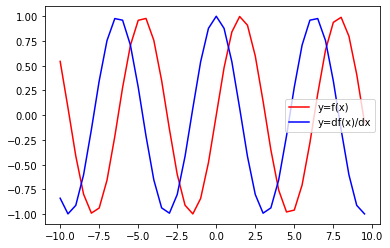

In [161]:
plt.plot(x_np,y_np,'r',label='y=f(x)')
plt.plot(x_np,x_grad_np,'b',label='y=df(x)/dx')
plt.legend()
plt.show()

## 线性回归

回归（regression）是能为一个或多个自变量与因变量之间关系建模的一类方法。 在自然科学和社会科学领域，回归经常用来表示输入和输出之间的关系。

在机器学习领域中的大多数任务通常都与预测（prediction）有关。 当我们想预测一个数值时，就会涉及到回归问题。 常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、 预测需求（零售销量等）。 但不是所有的预测都是回归问题。 在后面的章节中，我们将介绍分类问题。分类问题的目标是预测数据属于一组类别中的哪一个。

### 线性回归的基本元素
首先，假设自变量**x**和因变量y之间是线性关系的，也就是y可以表示为**x**中元素的加权和。<br>
假设一栋房子的价格可以有房子的面积和房龄决定，为了开发一套预测房屋价格的模型，我们需要先去收集大量数据，这些数据称为***训练集***，每行数据（没套房子的完整信息）称为***样本***。我们所想要预测的目标（例如房子的价格）称为***标签***或***目标***，预测所依赖的自变量称为***特征***或***协变量***。<br>
通常我们使用n来表示训练集中样本的数量。对索引为i的样本,其输入表示为$x^{(i)}=[x_1^{(i)},x_2^{(i)}]^T$，其对应的标签为$y^{(i)}$

### 线性模型
线性假设是指***标签***（房价），可以表现为***特征***（面积和房龄）的加权和,如下式：<br><br>
$$
price = w_{area}.area + w_{age}.age + b
$$<br><br>
其中两个$w_{area},w_{age}$是***特征***的权重，b是偏移量或截距。<br>
给定一个数据集，我们的目标是寻找模型的权重和偏置，使得根据模型做出的预测大体符合数据里的真实价格。<br>
而在机器学习领域，我们通常使用的是高维数据集，建模时采用线性代数表示法会比较方便。 当我们的输入包含d个特征时，我们将预测结果$\hat y
$（通常使用“尖角”符号表示的估计值）表示为：<br>
$$
\hat y = w_1x_1+...+w_dx_d+b
$$<br>
将所有特征放到向量$x\in \mathbb{R}^d$中,并将所有权重放到$w\in \mathbb{R}^d$中。我们可以用点积的形式简洁的表示模型：
$$
\hat y = w^Tx+b
$$

### 损失函数
在我们开始考虑如何用模型拟合（fit）数据之前，我们需要确定一个拟合程度的度量。 损失函数（loss function）能够量化目标的实际值与预测值之间的差距。 通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。 回归问题中最常用的损失函数是平方误差函数。当样本$i$的预测值为$\hat y^{(i)}$,其相应的真实标签为$\hat y^{(i)}$时，平方误差可以定义为以下公式：
$$
l^{(i)}(w,b)=\frac{1}{2}(\hat y^{(i)}-y^{(i)})^2
$$

常数$\frac{1}{2}$不会带来本质的差别，但这样在形式上稍微简单一些 （因为当我们对损失函数求导后常数系数为1）。 由于训练数据集并不受我们控制，所以经验误差只是关于模型参数的函数。 为了进一步说明，来看下面的例子。 我们为一维情况下的回归问题绘制图像,如下:
![](https://notebook-1313307098.cos.ap-nanjing.myqcloud.com/nonebook/20230328163516.png)
由于平方误差函数中的二次方项，估计值$\hat y^{(i)}$和观测值$y^{(i)}$之间较大的差异将导致更大的损失。 为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）:
$$
L(w,b) = \frac{1}{n}\sum_{i=1}^nl^{(i)}(w,b)=\frac{1}{n}\sum_{i=1}^n\frac{1}{2}(w^Tx^{(i)}+b-y^{(i)})^2
$$
在训练模型时我们希望找到一组参数$(w^*,b^*)$，这组参数能最小化在所有训练样本上的总损失。如下式：
$$
w^*,b^* = \underset{w,b}{argmin} L(w,b)
$$

### 解析解
线性回归刚好是一个很简单的优化问题。 与我们将在本书中所讲到的其他大部分模型不同，线性回归的解可以用一个公式简单地表达出来， 这类解叫作解析解（analytical solution）。 首先，我们将偏置$b$合并到参数$w$中，合并方法是在包含所有参数的矩阵中附加一列。 我们的预测问题是最小化$||y-Xw||^2$。 这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小点。 将损失关于$w$的导数设为0，得到解析解：
$$
w^*=(X^TX)^{-1}X^Ty
$$
像线性回归这样的简单问题存在解析解，但并不是所有的问题都存在解析解。 解析解可以进行很好的数学分析，但解析解对问题的限制很严格，***导致它无法广泛应用在深度学习里。***

### 随机梯度下降
即使在我们无法得到解析解的情况下，我们仍然可以有效地训练模型。 在许多任务上，那些难以优化的模型效果要更好。 因此，弄清楚如何训练这些难以优化的模型是非常重要的。<br>

本书中我们用到一种名为梯度下降（gradient descent）的方法， 这种方法几乎可以优化所有深度学习模型。 它通过不断地在损失函数递减的方向上更新参数来降低误差。<br>

梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值） 关于模型参数的导数（在这里也可以称为梯度）。 但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。 因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本， 这种变体叫做小批量随机梯度下降（minibatch stochastic gradient descent）。<br>

在每次迭代中，我们首先随机抽取一个小批量$\beta$,然后我们计算小批量损失函数关于模型参数的导数（也可以称作梯度）。最后我们将梯度乘以一个预先确定的正数$\eta$（学习率），再除以小批量样本数$|\beta|$，并从当前参数的值中减掉。<br>

总结一下，算法的步骤如下： （1）初始化模型参数的值，如随机初始化； （2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。 对于平方损失和仿射变换，我们可以明确地写成如下形式:
$$
w_{new}\gets w - \frac{\eta}{|\beta|}\sum_{i\in\beta}\sigma_wl^{(i)}(w,b)= w - \frac{\eta}{|\beta|}\sum_{i\in \beta}x^{(i)}(w^Tx^{(i)}+b-y^{(i)})\\
b_{new}\gets b - \frac{\eta}{|\beta|}\sum_{i\in\beta}\sigma_bl^{(i)}(w,b)= b - \frac{\eta}{|\beta|}\sum_{i\in \beta}(w^Tx^{(i)}+b-y^{(i)})
$$<br>

我们用下面数学公式来表示一下更新过程（$\sigma$表示偏导数）：
$$
(w,b) \gets (w,b) - \frac{\eta}{|\beta|}\sum_{i\in \beta}\sigma_{(w,b)}l^{(i)}(w,b)
$$ <br>
上式中$w,x$都是向量。在这里，更优雅的向量表示法比系数表示法（如$w_1,w_2,...,w_d$）更具有可读性.$|\beta|$表示小批量样本的数量（batch size）。$\eta$表示学习率。批量大小和学习率是预先指定的，不是训练模型得到的/这些可以调整但不在训练过程中更新的参数称为超参数。调参是选择超参数的过程。<br>

在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后）， 我们记录下模型参数的估计值，表示为$\hat w,\hat b$。 但是，即使我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值。 因为算法会使得损失向最小值缓慢收敛，但却不能在有限的步数内非常精确地达到最小值。

线性回归恰好是一个在整个域中只有一个最小值的学习问题。 但是对像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。 深度学习实践者很少会去花费大力气寻找这样一组参数，使得在训练集上的损失达到最小。 事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失， 这一挑战被称为泛化（generalization）。

### 矢量化加速
在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。 为了实现这一点，需要我们对计算进行矢量化， 从而利用线性代数库，而不是在Python中编写开销高昂的for循环。

In [30]:
import math
import time
import numpy as np
import torch
from d2l import torch as d2l
from matplotlib import pyplot as plt

由于在本书中我们将频繁地进行运行时间的基准测试，所以我们定义一个计时器：

In [10]:
class Timer:
    # 记录多次运行的时间
    def __init__(self):
        self.times = []
        self.start()
    def start(self):
        """启动计时器"""
        self.tik = time.time()
    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time()-self.tik)
        return self.times[-1]
    def avg(self):
        """返回平均时间"""
        return sum(self.times)/len(self.times)
    def summ(self):
        """返回时间综总和"""
        return sum(self.times)
    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

现在我们可以对工作负载进行基准测试。

首先，我们使用for循环，每次执行一位的加法。

In [11]:
n = 100
a = torch.ones(n)
b = torch.ones(n)

In [19]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
timer.stop()

0.010473012924194336

In [20]:
timer.start()
d = a + b
timer.stop()

0.0

结果很明显，第二种方法比第一种方法快得多。 矢量化代码通常会带来数量级的加速。 另外，我们将更多的数学运算放到库中，而无须自己编写那么多的计算，从而减少了出错的可能性。

### 正态分布与平方损失
接下来，我们通过对噪声分布的假设来解读平方损失目标函数。

正态分布和线性回归之间的关系很密切。 正态分布（normal distribution），也称为高斯分布（Gaussian distribution）， 最早由德国数学家高斯（Gauss）应用于天文学研究。 简单的说，若随机变量$x$具有均值$\mu$和方差$\sigma ^2$（标准差$\sigma$），其正态分布概率密度函数如下：

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^-\frac{(x-\mu)^2}{2\sigma^2}
$$

下面定义一个函数计算正态分布。

In [21]:
def normal(x,mu,sigma):
    p = 1/math.sqrt(2*math.pi*sigma)
    return p*np.exp(-(x-mu)**2/2*sigma**2)

现在我们可视化正态分布。

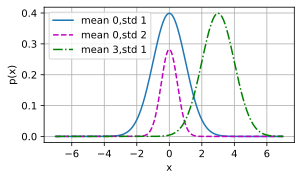

In [40]:
# 定义取值范围和间隔
x = np.arange(-7,7,0.01)
# 均值和标准差
params = [(0,1),(0,2),(3,1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)',legend=[f'mean {mu},std {sigma}' for mu,sigma in params],figsize=(4.5,2.5))

就像我们所看到的，改变均值会产生沿x轴的偏移，增加方差将会分散分布、降低其峰值。

### 小结
- 机器学习模型中的关键要素是训练数据、损失函数、优化算法，还有模型本身。

- 矢量化使数学表达上更简洁，同时运行的更快。

- 最小化目标函数和执行极大似然估计等价。

- 线性回归模型也是一个简单的神经网络。

### 练习
![](https://notebook-1313307098.cos.ap-nanjing.myqcloud.com/nonebook/20230329113631.png)

## 线性回归从零开始实现
在了解线性回归的关键思想之后，我们可以开始通过代码来动手实现线性回归了。 在这一节中，我们将从零开始实现整个方法， 包括数据流水线、模型、损失函数和小批量随机梯度下降优化器。 虽然现代的深度学习框架几乎可以自动化地进行所有这些工作，但从零开始实现可以确保我们真正知道自己在做什么。 同时，了解更细致的工作原理将方便我们自定义模型、自定义层或自定义损失函数。 在这一节中，我们将只使用张量和自动求导。 在之后的章节中，我们会充分利用深度学习框架的优势，介绍更简洁的实现方式。

In [41]:
import random
import torch
from d2l import torch as d2l

### 生成数据集
为了简单起见，我们将根据带有噪声的线性模型构造一个人造数据集。 我们的任务是使用这个有限样本的数据集来恢复这个模型的参数。 我们将使用低维数据，这样可以很容易地将其可视化。 在下面的代码中，我们生成一个包含1000个样本的数据集， 每个样本包含从标准正态分布中采样的2个特征。 我们的合成数据集是一个矩阵$X\in \mathbb{R}^{1000*2} $

我们使用线性模型参数$w=[2,-3.4]^T、b=4.2$和噪声项$\epsilon$生成数据集及其标签：
$$
y = Xw+b+\epsilon
$$
$\epsilon$可以视为模型预测和标签时的潜在观测误差。 在这里我们认为标准假设成立，即$\epsilon$服从均值为0的正态分布。 为了简化问题，我们将标准差设为0.01。 下面的代码生成合成数据集。

In [ ]:
'''
synthetic_data(合成数据)
w：权重
b：偏移量
num_examples：生成样本的大小
'''
def synthetic_data(w,b,num_examples):
    # 从均值为0,标准差为1的正态分布中采样随机数,生成（1000*2）的数据集
    X = torch.normal(0,1,(num_examples,len(w)))
    # y=Xw+b
    y = torch.matmul(X,w)+b
    # y=Xw+b+噪声,噪声符合均值为0，标准差为0.01，形状=y.shape
    y+= torch.normal(0,0.01,y.shape)
    # 将目标转化为和特征一样的形状，x(1000*2),y(1000*1)
    return X,y.reshape(-1,1)
true_w = torch.tensor([2,-3.4])
true_b = 4.2
# 得到随机生成的特征值和目标
features,lables = synthetic_data(true_w,true_b,1000)

注意，features中的每一行都包含一个二维数据样本， labels中的每一行都包含一维标签值（一个标量）

In [94]:
print('features:',features[0],'lables:',lables[0])

features: tensor([-1.5077,  1.3884]) lables: tensor([-3.5424])


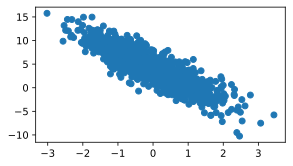

In [95]:
plt.scatter(features[:,1],lables)

我们绘制第二个特征features[:,1]和lables的散点图，可以观察到两者间的线性关系

### 读取数据集
我们通过随机小批量梯度下降法进行线性回归，因此每次要从样本中随机抽取小批量的样本。<br>

因此我们定义一个函数data_iter函数，该函数接收数据集，和批量大小，生成大小为batch_size的小批量，每个小批量数据集含有一组特征和对应的标签。

In [ ]:
def data_iter(features,lables,batch_size):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 将数据集的索引打乱，这样在取的时候相当于是随机读取
    random.shuffle(indices)
    # 从0遍历到num_examples，每次步长为batch_size
    for i in range(0,num_examples,batch_size):
        # min防止超出列表索引
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        # 每次取出[i:i+batch_size]个样本，也就是10个样本
        yield features[batch_indices],lables[batch_indices]

In [106]:
batch_size = 10
for X,y in data_iter(features,lables,batch_size):
    print(X,'\n',y)
    break

tensor([[-0.8209, -0.3893],
        [ 2.3439,  1.9330],
        [ 1.1874, -0.4204],
        [-0.9635, -1.9056],
        [ 0.5265, -2.0734],
        [-0.0847, -1.2406],
        [ 1.2889,  0.4121],
        [-2.3453,  1.9717],
        [ 0.7579, -0.8275],
        [ 0.3513, -0.0792]]) 
 tensor([[ 3.8798],
        [ 2.3276],
        [ 8.0033],
        [ 8.7556],
        [12.2891],
        [ 8.2537],
        [ 5.3843],
        [-7.1861],
        [ 8.5407],
        [ 5.1566]])


当我们运行迭代时，我们会连续地获得不同的小批量，直至遍历完整个数据集。 上面实现的迭代对教学来说很好，但它的执行效率很低，可能会在实际问题上陷入麻烦。 例如，它要求我们将所有数据加载到内存中，并执行大量的随机内存访问。 在深度学习框架中实现的内置迭代器效率要高得多， 它可以处理存储在文件中的数据和数据流提供的数据。

### 初始化参数模型
我们首先初始化我们猜测的权重$\hat w,\hat b$,然后再生成模型。，我们通过从均值为0、标准差为0.01的正态分布中采样随机数来初始化权重， 并将偏置初始化为0。

In [179]:
# 生成猜测权重
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### 定义模型
接下来，我们必须定义模型，将模型的输入和参数同模型的输出关联起来。 回想一下，要计算线性模型的输出， 我们只需计算输入特征$X$和模型权重$w$的矩阵-向量乘法后加上偏置$b$。 注意，上面的$Xw$是一个向量，而$b$是一个标量。 回想一下 2.1.3节中描述的广播机制： 当我们用一个向量加一个标量时，标量会被加到向量的每个分量上。

In [109]:
#  定义线性回归模型模型
def linemode(X,w,b):
    return torch.matmul(X,w)+b

### 定义损失函数
因为需要计算损失函数的梯度，所以我们应该先定义损失函数。 这里我们使用 3.1节中描述的平方损失函数。 在实现中，我们需要将真实值y的形状转换为和预测值y_hat的形状相同。

In [103]:
# 定义损失函数,y_hat,预测值
def square_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

### 定义优化算法（随机梯度下降）
$$
(w,b) \gets (w,b) - \frac{\eta}{|\beta|}\sum_{i\in \beta}\sigma_{(w,b)}l^{(i)}(w,b)
$$ <br>

In [112]:
def sgd(params,lr,batch_size):
    '''
    params：权重向量
    lr：学习率
    '''
    with torch.no_grad():
        for params in params:
            params -= lr*params.grad/batch_size
            params.grad.zero_()

### 训练
现在我们已经准备好了模型训练所有需要的要素，可以实现主要的训练过程部分了。 理解这段代码至关重要，因为从事深度学习后， 相同的训练过程几乎一遍又一遍地出现。 在每次迭代中，我们读取一小批量训练样本，并通过我们的模型来获得一组预测。 计算完损失后，我们开始反向传播，存储每个参数的梯度。 最后，我们调用优化算法sgd来更新模型参数。

概括一下，我们将执行以下循环：
- 初始化参数
- 重复一下训练，知道完成
 - 计算梯度$g \gets \sigma_{(w,n)}\frac{1}{|\beta|}\sum_{i\in\beta}l(x^{(i)},y^{(i)},w,b)$
 - 更新参数$(w,b) \gets (w,b)-\eta g$
 

在每个迭代周期（epoch）中，我们使用data_iter函数遍历整个数据集， 并将训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。 这里的迭代周期个数num_epochs和学习率lr都是超参数，分别设为3和0.03。 

In [180]:
lr = 0.03
num_epochs = 3
net = linemode
loss = square_loss

for epoch in range(num_epochs):
    for X,y in data_iter(features,lables,batch_size):
        l = loss(net(X,w,b),y) # 得到损失函数
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起
        # 以此计算[w,b]的梯度，先backward
        l.sum().backward()
        sgd([w,b],lr,batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features,w,b),lables)
        print(f'epoch {epoch+1},loss {float(train_l.mean()):f}')
        print(f'w {w},b {b}')

epoch 1,loss 0.042972
w tensor([[ 1.8712],
        [-3.2492]], requires_grad=True),b tensor([3.9766], requires_grad=True)
epoch 2,loss 0.000168
w tensor([[ 1.9927],
        [-3.3936]], requires_grad=True),b tensor([4.1873], requires_grad=True)
epoch 3,loss 0.000051
w tensor([[ 1.9996],
        [-3.3994]], requires_grad=True),b tensor([4.1990], requires_grad=True)


因为我们使用的是自己合成的数据集，所以我们知道真正的参数是什么。 因此，我们可以通过比较真实参数和通过训练学到的参数来评估训练的成功程度。 事实上，真实参数和通过训练学到的参数确实非常接近。

In [176]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0003, -0.0002], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0002], grad_fn=<RsubBackward1>)


注意，我们不应该想当然地认为我们能够完美地求解参数。 在机器学习中，我们通常不太关心恢复真正的参数，而更关心如何高度准确预测参数。 幸运的是，即使是在复杂的优化问题上，随机梯度下降通常也能找到非常好的解。 其中一个原因是，在深度网络中存在许多参数组合能够实现高度精确的预测。

### 小结
- 我们学习了深度网络是如何实现和优化的。在这一过程中只使用张量和自动微分，不需要定义层或复杂的优化器。
- 这一节只触及到了表面知识。在下面的部分中，我们将基于刚刚介绍的概念描述其他模型，并学习如何更简洁地实现其他模型。

### 练习
![](https://notebook-1313307098.cos.ap-nanjing.myqcloud.com/nonebook/20230329174451.png)

1.权重初始为0编译错误，梯度类型为NonrType，貌似不是很意外，$wx$直接原地消失了。算法当然无效。。。

2.应该可以吧？和导体材质，温度，体积，长度等有关？猜测的，找找数据试一下。

3.这个也可以吧。和上面一样的问题是物体和导体的体积不一定规则。

4.想到一个就是一阶导后自变量项为0了，这个再导就为0了，暂时没想到解决办法。。。

5.两个形状一样才可以按元素运算，因为不确定形状，但两个形状一致肯定没毛病，前提是大小可以确定相同

6.学习率越大下降越快

7.最后的小批量样本数量和前面的不一样

### 电压电流模型
随机生成均值为1，标准差为0.01的电流$I$数据集。我们设定电阻为4.5$\Omega$，噪音为0.5，这里的噪音可以是热量$J$等。
$$
U = I.R + J
$$

In [259]:
# 生成数据集
def dataset(R,data_sum):
    '''
    w：权重（电阻）
    b：噪音（热量等）
    sum_data：生成样本的大小
    '''
    I = torch.normal(1,0.01,(data_sum,len(R)))
    U = torch.matmul(I,R)
    U += torch.normal(0,0.01,U.shape)
    return I,U.reshape(-1,1)
ture_R = torch.tensor([4.5])
features,lables = dataset(ture_R,500)

In [260]:
f'I:{features[0]},U:{lables[0]}'

'I:tensor([1.0042]),U:tensor([4.5301])'

In [261]:
# 读取数据
def data_gets(features,lables,batch_size):
    data_sum = len(features)
    index = list(range(data_sum))
    random.shuffle(index)
    for i in range(0,data_sum,batch_size):
        index_set = torch.tensor(index[i:min(i+batch_size,data_sum)])
        yield features[index_set],lables[index_set]

In [237]:
batch_size = 10
# 测试数据读取
for X,u in data_gets(features,lables,batch_size):
    print(X,'\n',u)
    print(X.shape)

tensor([[0.9894],
        [1.0002],
        [0.9952],
        [0.9928],
        [1.0039],
        [1.0157],
        [1.0031],
        [0.9979],
        [0.9897],
        [0.9880]]) 
 tensor([[4.4493],
        [4.4985],
        [4.4797],
        [4.4671],
        [4.5243],
        [4.5782],
        [4.4995],
        [4.5097],
        [4.4652],
        [4.4362]])
torch.Size([10, 1])
tensor([[1.0039],
        [0.9954],
        [1.0115],
        [0.9976],
        [0.9904],
        [1.0104],
        [0.9995],
        [0.9988],
        [0.9962],
        [0.9989]]) 
 tensor([[4.5106],
        [4.4837],
        [4.5582],
        [4.5028],
        [4.4543],
        [4.5537],
        [4.4711],
        [4.5099],
        [4.4822],
        [4.4996]])
torch.Size([10, 1])
tensor([[1.0121],
        [1.0038],
        [1.0116],
        [0.9913],
        [0.9905],
        [0.9860],
        [1.0143],
        [1.0073],
        [0.9941],
        [1.0010]]) 
 tensor([[4.5509],
        [4.5163],
        [4.57

In [286]:
# 初始化参数模型
R = torch.normal(0,0.01,size=(1,1),requires_grad=True)

In [263]:
# 定义模型
def line(X,R):
    return torch.matmul(X,R)

In [266]:
# 定义损失函数
def loss(u_hat,u):
#     print(u_hat.shape)
#     print(u.shape)
    return (u_hat-u.reshape(u_hat.shape))**2/2

In [267]:
# 定义优化算法
def sdg(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [287]:
# 开始训练
lr = 0.04
num_epochs = 4

for epoch in range(num_epochs):
    for X,u in data_gets(features,lables,batch_size):
        l = loss(line(X,R),u)
        l.sum().backward()
        sdg([R],lr,batch_size)
    with torch.no_grad():
        train = loss(line(features,R),lables)
        print(f'epoch:{epoch+1},loss:{float(train.mean()):f}')
        print(f'ture:{ture_R},train:{R}')

epoch:1,loss:0.169343
ture:tensor([4.5000]),train:tensor([[3.9193]], requires_grad=True)
epoch:2,loss:0.002900
ture:tensor([4.5000]),train:tensor([[4.4252]], requires_grad=True)
epoch:3,loss:0.000098
ture:tensor([4.5000]),train:tensor([[4.4908]], requires_grad=True)
epoch:4,loss:0.000050
ture:tensor([4.5000]),train:tensor([[4.4996]], requires_grad=True)


### 简易手动实现求梯度

In [75]:
import numpy as np
import copy
def numerical_gradient(f,x,y):
    h = 0.0001
    grad = np.zeros_like(x)#生成和x形状相同的数组
    for idx in range(x.shape[0]):
        #print(x.shape)
        tmp_val = copy.copy(x[idx])
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x[idx],y[idx])
       # print(fxh1)
        x[idx] = tmp_val - h 
        fxh2 = f(x[idx],y[idx])
        #print(fxh2)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #还原值
        
    return np.around(grad,2)

In [77]:
def fun(x,y):
    return x**2 + 2*x*y + y**2

In [78]:
x = np.array([1,2],dtype=np.float32)
y = np.array([3,4],dtype=np.float32)
numerical_gradient(fun,x,y)

array([ 8.  , 11.99], dtype=float32)

## Softmax回归
在上一节中我们学习了线性回归，然而线性回归用于预测多少的问题。比如房屋的售价或者患者住院的天数。

事实上我们对分类问题也感兴趣，不是多少而是哪一个：
- 某个电子邮件是否属于垃圾邮件文件夹？
- 某个用户可能注册或不注册订阅服务？
- 某个图像描绘的是驴、狗、猫、还是鸡？
- 某人接下来最有可能看哪部电影？


通常，机器学习实践者用分类这个词来描述两个有微妙差别的问题： 1. 我们只对样本的“硬性”类别感兴趣，即属于哪个类别； 2. 我们希望得到“软性”类别，即得到属于每个类别的概率。 这两者的界限往往很模糊。其中的一个原因是：即使我们只关心硬类别，我们仍然使用软类别的模型

### 分类问题
我们从一个图像的分类问题开始讨论这个问题。假设每次输入的是一个2* 2的灰度图像。我们可以用一个标量表示每个像素值，每个图像对应四个特征值$x_1,x_2,x_3,x_4$。此外，假设每个图像属于"猫、鸡、狗"中的一个。

接下来，我们要选择如何表示标签。 我们有两个明显的选择：最直接的想法是选择$y\in {1,2,3}$，分别代表"猫、鸡、狗"。这是在计算机上存储此类信息的有效方法。 如果类别间有一些自然顺序， 比如说我们试图预测${婴儿,儿童,青少年,青年人,中年人,老年人}$，那么将这个问题转变为回归问题，并且保留这种格式是有意义的。

但是一般的分类问题并不与类别之间的自然顺序有关。 幸运的是，统计学家很早以前就发明了一种表示分类数据的简单方法：独热编码（one-hot encoding）。 独热编码是一个向量，它的分量和类别一样多。 类别对应的分量设置为1，其他所有分量设置为0。 在我们的例子中，标签$y$将是一个三维向量， 其中$(1,0,0)$对应猫，$(0,1,0)$对应于鸡，$(0,0,1)$对应于狗：


$$
y \in {(1,0,0),(0,1,0),(0,0,1)}
$$

### 网络架构
为了估计所有可能类别的条件概率，我们需要一个有多个输出的模型，每个类别对应一个输出。 为了解决线性模型的分类问题，我们需要和输出一样多的仿射函数（affine function）。 每个输出对应于它自己的仿射函数。 在我们的例子中，由于我们有4个特征和3个可能的输出类别， 我们将需要12个标量来表示权重（带下标的$w$），3个标量来表示偏置（带下标的$b$）。下面我们为每个输入计算三个未规范化的预测（logit）：$o_1、o_2、o_3$。


$$
o_1 = x_1w_11+x_2w_12+x_3w_13+x_4w_14+b_1,\\
o_1 = x_1w_21+x_2w_22+x_3w_23+x_4w_24+b_2,\\
o_1 = x_1w_31+x_2w_32+x_3w_33+x_4w_34+b_3
$$

我们可以用神经网络图 图3.4.1来描述这个计算过程。 与线性回归一样，softmax回归也是一个单层神经网络。 由于计算得到的每个$o$都取决于所有的$x$所以softmax也是全连接层。
![](https://notebook-1313307098.cos.ap-nanjing.myqcloud.com/nonebook/20230406152145.png)

为了更简洁的表达模型，我们仍然使用线性代数符号。$o=Wx+b$，这是一种更适合数学和编写代码的形式。 由此，我们已经将所有权重放到一个$3*4$矩阵中。对于给定数据样本的特征$x$，我们的输出是由权重与输入特征进行矩阵-向量乘法再加上偏置$b$得到的。

### softmax运算
我们希望输出的$\hat y_j$可以视为属于$j$的概率，然后我们选择概率最大的一个作为我们的预测，这是一个很正常的思路，但是我们可否将为规范化的预测直接输出？答案的否定的。我们要想将输出视为概率必须保证输出为正数并且和为1。此外，我们需要一个训练的目标函数，来激励模型精准地估计概率。 例如， 在分类器输出0.5的所有样本中，我们希望这些样本是刚好有一半实际上属于预测的类别。 这个属性叫做校准（calibration）。

社会科学家邓肯·卢斯于1959年在选择模型（choice model）的理论基础上 发明的softmax函数正是这样做的： softmax函数能够将未规范化的预测变换为非负数并且总和为1，同时让模型保持 可导的性质。 为了完成这一目标，我们首先对每个未规范化的预测求幂，这样可以确保输出非负。 为了确保最终输出的概率值总和为1，我们再让每个求幂后的结果除以它们的总和。如下式：
$$
\hat y = softmax(o) 其中 \hat y = \frac {exp(o_j)} {\sum_k exp(o_k)}
$$

### 小批量样本的矢量化
为了提高计算效率并且充分利用GPU，我们通常会对小批量样本的数据执行矢量计算。 假设我们读取了一个批量的样本$X$， 其中特征维度（输入数量）为$d$，批量大小为$n$。 此外，假设我们在输出中有$q$个类别。 那么小批量样本的特征为$X\in \mathbb{R}^{n\times d}$，权重为$W\in\mathbb{R}^{d\times q}$，偏置为$b\in \mathbb{R}^{1\times q}$。 softmax回归的矢量计算表达式为：


$$
O = XW + b\\
Y\hat = softmax(O)
$$

### 损失函数
接下来，我们需要一个损失函数来度量预测的效果。 我们将使用最大似然估计，这与在线性回归中的方法相同。

**对数似然**

softmax函数给出了一个向量$\hat y$，我们可以将其视为“对给定任意输入$x$的每个类的条件概率”。例如，$\hat y_1 = P(y=猫|x)$。 假设整个数据集${X,Y}$具有n个样本，中索引$i$的样本由特征向量$x^{(1)}$和独热标签向量$y^{(i)}$组成。 我们可以将估计值与实际值进行比较：
$$
P(Y|X) = \prod_{i=1}^{n}P(y^{(i)}|x^{(i)})
$$
根据最大似然估计，我们最大化$P(Y|X)$，相当于最小化负对数似然：
$$
-lnP(Y|X) = \sum_{i=1}^n-lnP(y^{(i)}|x^{(i)}) = \sum_{i=1}^n l(y^{(i)},\hat y^{(i)})
$$
其中，对于任何标签$y$和模型预测$\hat y$，损失函数为：
$$
l(y,\hat y) = -\sum_{j=1}^qy_jln\hat y_j
$$
在本节稍后的内容会讲到， (3.4.8)中的损失函数 通常被称为交叉熵损失（cross-entropyloss）。 由于$y$是一个长度为$q$的独热编码向量， 所以除了一个项以外的所有项$j$都消失了。 由于所有$\hat y_j$都是预测的概率，所以它们的对数永远不会大于0。 因此，如果正确地预测实际标签，即如果实际标签$P(y|x) = 1$， 则损失函数不能进一步最小化。 注意，这往往是不可能的。 例如，数据集中可能存在标签噪声（比如某些样本可能被误标）， 或输入特征没有足够的信息来完美地对每一个样本分类。

**softmax及其导数**
由于softmax和相关的损失函数很常见， 因此我们需要更好地理解它的计算方式。 利用softmax的定义，我们得到：

$$
l(y,\hat y) = -\sum_{j=1}^qy_jln\frac{exp(o_j)}{\sum_{k=1}^qexp(o_k)}\\
=ln\sum_{k=1}^q exp(o_k)-\sum_{j=1}^q y_jo_j
$$

考虑相对于任何未规范化的预测$o_j$的导数，我们得到：
$$
\partial_{o_j}l(y,\hat y) = \frac{exp(o_j)}{\sum_{k=1}^qexp(o_k)}-y_j=softmax(o)_j-y_j
$$
换句话说，导数是我们softmax模型分配的概率与实际发生的情况（由独热标签向量表示）之间的差异。 从这个意义上讲，这与我们在回归中看到的非常相似， 其中梯度是观测值$y$和估计值$\hat y$之间的差异。 这不是巧合，在任何指数族分布模型中 （参见本书附录中关于数学分布的一节）， 对数似然的梯度正是由此得出的。 这使梯度计算在实践中变得容易很多。

### 交叉熵损失
现在让我们考虑整个结果分布的情况，即观察到的不仅仅是一个结果。 对于标签$y$，我们可以使用与以前相同的表示形式。 唯一的区别是，我们现在用一个概率向量表示，$(0.1,0.2,0.7)$， 而不是仅包含二元项的向量$(0,0,1)$
。 我们使用 (3.4.8)来定义损失$l$，它是所有标签分布的预期损失值。 此损失称为交叉熵损失（cross-entropy loss），它是分类问题最常用的损失之一。 本节我们将通过介绍信息论基础来理解交叉熵损失。

### 信息论基础
信息论涉及编码、解码、发送以及尽可能简洁的处理信息或数据
#### 熵
信息论的基本定理之一是量化数据中的信息内容。在信息论中，该数值被称为分布P的熵。可以通过以下方程得到：
$$
H[P] = \sum_j - P(j)logP(j)
$$
信息论的基本定理指出，为了对从分布$p$中随机抽取的数据进行编码， 我们至少需要$H[P]$“纳特（nat）”对其进行编码。 “纳特”相当于比特（bit），但是对数底为$e$而不是2。因此，一个纳特是$\frac{1}{log(2)}≈1.44$比特。

#### 信息量
压缩与预测有什么关系呢？ 想象一下，我们有一个要压缩的数据流。 如果我们很容易预测下一个数据，那么这个数据就很容易压缩。 为什么呢？ 举一个极端的例子，假如数据流中的每个数据完全相同，这会是一个非常无聊的数据流。 由于它们总是相同的，我们总是知道下一个数据是什么。 所以，为了传递数据流的内容，我们不必传输任何信息。也就是说，“下一个数据是xx”这个事件毫无信息量。

但是，如果我们不能完全预测每一个事件，那么我们有时可能会感到”惊异”。 克劳德·香农决定用信息量$log\frac{1}{P(j)} = -logP(j)$ 来量化这种惊异程度。 在观察一个事件$j$时，并赋予它（主观）概率$P(j)$。 当我们赋予一个事件较低的概率时，我们的惊异会更大，该事件的信息量也就更大。 

#### 重新审视交叉熵
如果把熵$H(P)$想象为“知道真实概率的人所经历的惊异程度”，那么什么是交叉熵？ 交叉熵从$P$到$Q$，记为$H(P,Q)$。我们可以把交叉熵想象为“主观概率为$Q$的观察者在看到根据概率$P$生成数据时的预期惊异”。当$P=Q$时，交叉熵达到最低。在这种情况下，从$P$到$Q$的交叉熵是$H(P,P)=H(P)$。

简而言之，我们可以从两方面来考虑交叉熵分类目标：（i）最大化观测数据的似然；（ii）最小化传达标签所需的惊异。

### 模型预测和评估

在训练softmax回归模型后，给出任何样本特征，我们可以预测每个输出类别的概率。 通常我们使用预测概率最高的类别作为输出类别。 如果预测与实际类别（标签）一致，则预测是正确的。 在接下来的实验中，我们将使用精度（accuracy）来评估模型的性能。 精度等于正确预测数与预测总数之间的比率。

### 小结
- softmax运算获取一个向量并将其映射为概率
- softmax回归试用于分类问题，它使用了softmax运算中输出类别的概率分布
- 交叉熵是一个衡量两个概率分布之间差异的很好的度量，它测量给定模型编码数据所需的比特数。

### 练习
![](https://notebook-1313307098.cos.ap-nanjing.myqcloud.com/nonebook/20230410175207.png)

## 图像分类数据集
MNIST数据集是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。 我们将使用类似但更复杂的Fashion-MNIST数据集

In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

### 读取数据集
我们可以通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中。

In [24]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
# 并处以255使得所有像素的均值在0-1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="/data",train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

Fashion-MNIST由10个类别的图像组成， 每个类别由训练数据集（train dataset）中的6000张图像 和测试数据集（test dataset）中的1000张图像组成。 因此，训练集和测试集分别包含60000和10000张图像。 测试数据集不会用于训练，只用于评估模型性能。

In [26]:
len(mnist_train),len(mnist_test)

(60000, 10000)

每个输入图像的高度和宽度均为28像素。 数据集由灰度图像组成，其通道数为1。 

In [27]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。 以下函数用于在数字标签索引及其文本名称之间进行转换。

In [28]:
def get_mnist_lables(lables):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in lables]

现在我们可以创建一个函数来可视化这些样本。

In [29]:
def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
    """h绘制图像列表"""
    figsize = (num_cols*num_rows,num_rows*scale)
    _,axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    axes = axes.flatten()
    for i,(ax,img) in enumerate(zip(axes,imgs)):   #zip()聚合两个可迭代对象为元组
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL img
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes        

以下是训练数据集中前几个样本的图像及其相应的标签。

array([<AxesSubplot: title={'center': 'ankle boot'}>,
       <AxesSubplot: title={'center': 't-shirt'}>,
       <AxesSubplot: title={'center': 't-shirt'}>,
       <AxesSubplot: title={'center': 'dress'}>,
       <AxesSubplot: title={'center': 't-shirt'}>,
       <AxesSubplot: title={'center': 'pullover'}>,
       <AxesSubplot: title={'center': 'sneaker'}>,
       <AxesSubplot: title={'center': 'pullover'}>,
       <AxesSubplot: title={'center': 'sandal'}>,
       <AxesSubplot: title={'center': 'sandal'}>,
       <AxesSubplot: title={'center': 't-shirt'}>,
       <AxesSubplot: title={'center': 'ankle boot'}>,
       <AxesSubplot: title={'center': 'sandal'}>,
       <AxesSubplot: title={'center': 'sandal'}>,
       <AxesSubplot: title={'center': 'sneaker'}>,
       <AxesSubplot: title={'center': 'ankle boot'}>,
       <AxesSubplot: title={'center': 'trouser'}>,
       <AxesSubplot: title={'center': 't-shirt'}>], dtype=object)

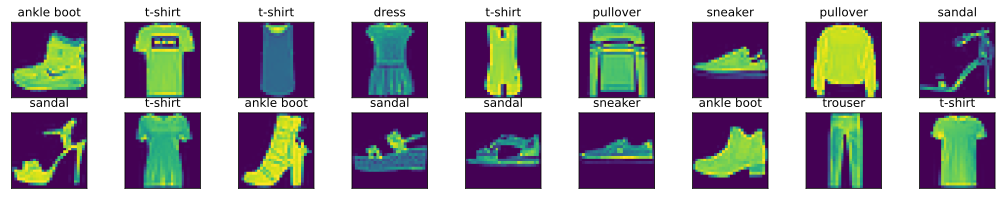

In [30]:
X,y = next(iter(data.DataLoader(mnist_train,batch_size=18)))
show_images(X.reshape(18,28,28),2,9,titles=get_mnist_lables(y))

### 读取小批量
为了使我们在读取训练集和测试集时更容易，我们使用内置的数据迭代器，而不是从零开始创建。 回顾一下，在每次迭代中，数据加载器每次都会读取一小批量数据，大小为batch_size。 通过内置数据迭代器，我们可以随机打乱了所有样本，从而无偏见地读取小批量。

In [37]:
batch_size = 256

def get_dataloader_workers():
    return 4
train_iter = data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())

我们看一下读取训练数据所需的时间。

In [38]:
timer = d2l.Timer()
for X,y in train_iter:
    continue
f'{timer.stop():.2f}sec'    

'12.83sec'

### 整合所有组件
现在我们定义load_data_fashion_mnist函数，用于获取和读取Fashion-MNIST数据集。 这个函数返回训练集和验证集的数据迭代器。 此外，这个函数还接受一个可选参数resize，用来将图像大小调整为另一种形状。

In [41]:
def load_data_fashion_mnist(batch_size,resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

下面，我们通过指定resize参数来测试load_data_fashion_mnist函数的图像大小调整功能。

In [42]:
train_iter,test_iter = load_data_fashion_mnist(32,resize=64)
for X,y in train_iter:
    print(X.shape,X.dtype,y.shape,y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


我们现在已经准备好使用Fashion-MNIST数据集，便于下面的章节调用来评估各种分类算法。

### 练习
- 减少batch_size（如减少到1）是否会影响读取性能？
- 数据迭代器的性能非常重要。当前的实现足够快吗？探索各种选择来改进它。
- 查阅框架的在线API文档。还有哪些其他数据集可用？